<br>
<h1> The Efficient Frontier </h1>
<hr>
<h3> Portfolio Risk and Return </h3>
<br>
Assume that we have two assets in our portfolio
Let's also say that we have a certain weight ($w_{a}$) for the risky asset $A$, and weight ($w_{b}$) for the risk-free asset $B$. The sum of weights should be equal to one, so that: $ w_{a} + w_{b} = 1.00 $
<br>
<br>
<b> Returns </b>
<br>
Thus, the expected return for the portfolio ($p$) should be equal to:
<br>
<br>
\begin{align}
\mathbb{E}(p) & = w_{a}\mathbb{E}(A) + w_{b}\mathbb{E}(B)\\
\mathbb{E}(p) & = w_{a}\mathbb{E}(A) + (1 - w_{a})\mathbb{E}(B)\\
\end{align}
<br>
We could then infer that our expected return for the portfolio is equal to the sum of an Asset's weight times their respective expected returns:
<br>
<br>
\begin{align}
\mathbb{E}(p) & = \sum_{i=1}^{k}w_{i}\mathbb{E}(r_{i})
\end{align}
<br>
<br>
<b> Volatility </b>
<br>
Similarly to returns, volatility is also additive. Thus:
<br>
<br>
\begin{align}
Var(X) & = \sigma^{2}(X)\equiv \sigma_{X}^{2} \equiv \mathbb{E}[(X-\mathbb{E}[X])^2] \\
\therefore Var(X) & = \mathbb{E}[(X-\mathbb{E}[X])^2] = \mathbb{E}[X^{2}] - \mathbb{E}[X]^2\\ \\
& \text{Remember that }Var(X) = Cov(X,X).\text{ Substituting } X \text{ for} A + B:  \\ \\
Var(A + B) & = Cov(A+B, A+B) \\
& = \mathbb{E}[(A - \mathbb{E}[A])(B - \mathbb{E}[B])] \\
& = \mathbb{E}[(A+B)^{2}] - \mathbb{E}[A + B]\mathbb{E}[A+B] \\
& = \mathbb{E}[A^{2}] - \mathbb{E}[A]^{2} + \mathbb{E}[B^{2}] - \mathbb{E}[B]^{2} + 2(\mathbb{E}[AB] - \mathbb{E}[A]\mathbb{E}[B])\\ \\
\therefore Var(A + B) & = Var(A) + Var(B) + 2Cov(A, B)
\end{align}
<br>
<br>
Thus, the volatility should be:
<br>
\begin{align}
\sigma_{p} & = \sqrt{Var(A) + Var(B) + 2Cov(A, B)}\\
\sigma_{p} & = \sqrt{w_{a}^{2}\sigma_{a}^{2} + w_{b}^{2}\sigma_{b}^{2} + 2w_{a}w_{b}\rho_{ab}\sigma_{a}\sigma_{b}}
\end{align}
<br>
<br>
We could also consider the following matrices:
<br>
<br>
\begin{align}
w & = 
\begin{bmatrix}
w_{a} & w_{b}
\end{bmatrix}\\
Cov(a, b) & = 
\begin{bmatrix}
\sigma_{a}^{2} & \sigma_{ab}\\
\sigma_{ba} & \sigma_{b}^{2}
\end{bmatrix}
\end{align}
<br>
Multiplying the transposed weight matrix ($w'$) and the covariance ($Cov(a,b)$) matrix, we have:
<br>
<br>
\begin{align}
\begin{bmatrix}
\sigma_{a}^{2} & \sigma_{ab}\\
\sigma_{ba} & \sigma_{b}^{2}
\end{bmatrix}
\begin{bmatrix}
w_{a}\\
w_{b}
\end{bmatrix}
= \begin{bmatrix}
\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}\\
\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b}
\end{bmatrix}
\end{align}
<br>
Let's now multiply the weight ($w$) matrix by our previous results:
<br>
<br>
\begin{align}
\begin{bmatrix}
w_{a} & w_{b}
\end{bmatrix}
\begin{bmatrix}
\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}\\
\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b}
\end{bmatrix} & =
\begin{bmatrix}
w_{a}(\sigma_{a}^{2}w_{a} + \sigma_{ab}w_{b}) + w_{b}(\sigma_{ba}w_{a} + \sigma_{b}^{2}w_{b})
\end{bmatrix}\\
& = [\sigma_{a}^{2}w_{a}^2 + \sigma_{ab}w_{b}w_{a} + \sigma_{ba}w_{a}w_{b} + \sigma_{b}^{2}w_{b}^2]\\
& = w_{a}^{2}\sigma_{a}^{2} + w_{b}^{2}\sigma_{b}^{2} + 2w_{a}w_{b}\sigma_{ab}\\
\end{align}
<br>
This is the exact same solution we had previously. Thus, we could refer to the portfolio's volatility as:
<br>
<br>
\begin{align}
\sigma_{p}^{2} & = w\Sigma w'\\
\therefore \sigma_{p} & = \sqrt{w\Sigma w'}
\end{align}
<br>
<br>
Now, let's see how we could find our portfolio return and volatility in a practical example:
<hr>
<h3> Two Asset Portfolio </h3>
<br>
Please consider the following portfolio:
<br>
● <i>SPDR S&P 500 ETF Trust (SPY)</i>
<br>
● <i>iShares 20+ Year Treasury Bond ETF (TLT)</i>
<br>

In [1]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import warnings
import waterfall_chart as waterfall
import seaborn as sns
import numpy.random as npr
from statsmodels.tsa.stattools import pacf
from arch import arch_model
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
from scipy.stats.distributions import t as tdist
import getFamaFrenchFactors as gff

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
# Data interval (monthly)
interval = '1mo'
# Date of calculation
end = dt.datetime.today()
# start of calculation period (relative to end - "today:)
start = end - relativedelta(years=15)
# Tickers from Yahoo! Finance
Tickers = ['SPY', 'TLT']
# Download data from Yahoo! (Adj Close to account for dividends and other corporate actions)
df = yf.download(Tickers, interval=interval, start=start)['Adj Close']
# Data into pandas dataframe
df = pd.DataFrame(df)
# Drop NaN (for non trading days)
df = df.dropna()
# Create a new DataFrame to calculate returns in continuous time
df1 = np.log(df) - np.log(df.shift(1))
# Drop first row (NaN)
df1 = df1[1::]

[*********************100%***********************]  2 of 2 completed


Let's now assume that we have an equally weighted portfolio. Thus $w_{a}$ = $w_{b}$ = $0.5$.

In [3]:
# Create array of equally weighted portfolio:
w = pd.Series([(1/(len(df.columns)))for x in range(len(df.columns))])
w = [weight for weight in w]
w

[0.5, 0.5]

The portfolio returns should look like this:

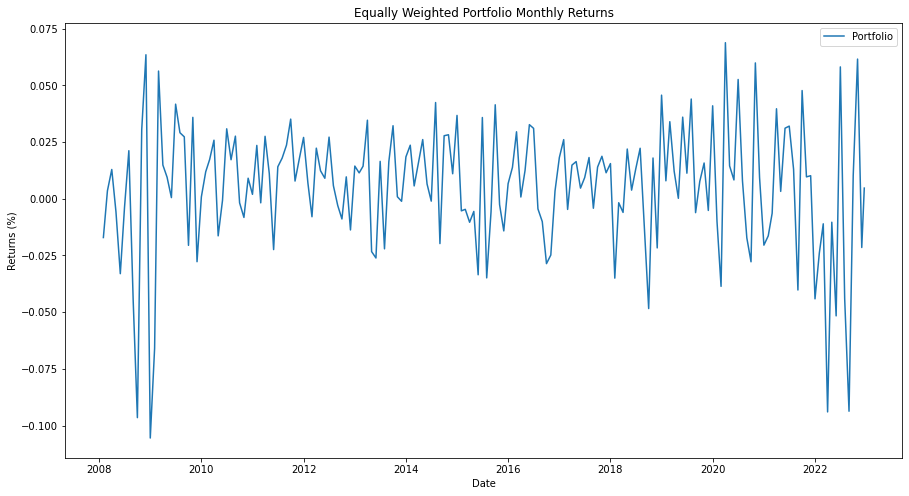

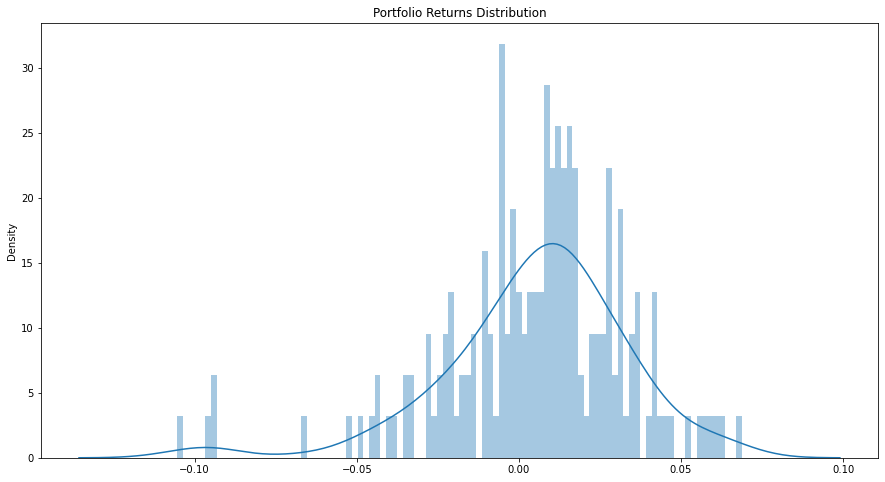

In [4]:
# Returns
Returns = np.sum(df1*w, axis=1)
# Plot:
plt.plot(Returns.index, Returns)
plt.legend(['Portfolio'])
plt.title('Equally Weighted Portfolio Monthly Returns')
plt.ylabel('Returns (%)')
plt.xlabel('Date')
plt.show()

sns.distplot(Returns, kde=True, bins=100, hist=True)
plt.title('Portfolio Returns Distribution')
plt.show()

Now, we can calculate the portfolio standard deviation ($\sigma$):

In [5]:
# Standard Deviation of monthly returns:
std = Returns.std()
std_an = std*np.sqrt(12)
print(f"Standard Deviation (Monthly): {round(std, 4)}")
print(f"Standard Deviation (Annualized): {round(std_an, 4)}")

Standard Deviation (Monthly): 0.0285
Standard Deviation (Annualized): 0.0986


Let's see if we can have the same results with the matrix multiplication:

In [6]:
# Weights
w = np.array(w)
# Covariance
cov = df1.cov()
# Variance with Matrix
var_mm = np.dot(w, np.dot(cov,w.T))
# Standard Deviation:
std_mm = np.sqrt(var_mm)
# The annualized volatility:
std_mma = std_mm*np.sqrt(12)
print(f"Standard Deviation (Monthly): {round(std_mm, 4)}")
print(f"Standard Deviation (Annualized): {round(std_mma, 4)}")

Standard Deviation (Monthly): 0.0285
Standard Deviation (Annualized): 0.0986


- We do indeed have the same results

Now, let's plot our efficient frontier.

- To do that, we will have a "simulation". We will let the weight vary from 0 to 1 for each asset (unless we have a long-short, meaning that weights can be less than zero, we will maintain weights ranging from 0 to 1. If you would like to look at a long-short portfolio, consider the range [-1, 2]).
- Let's also assume that our expected return is equal to the geometric average of returns (you could also assume the expected return as the average*12, or even use CAPM).

In [7]:
# 1. Expected returns
Er = ((np.prod(1+df1))**(12/((df1.count()))))-1
# Covariance Matrix
cov = cov
print(round(Er,3))
cov

SPY    0.076
TLT    0.025
dtype: float64


,SPY,TLT
SPY,0.002294,-0.000366
TLT,-0.000366,0.001677


Let's now use the desired range for our weights:

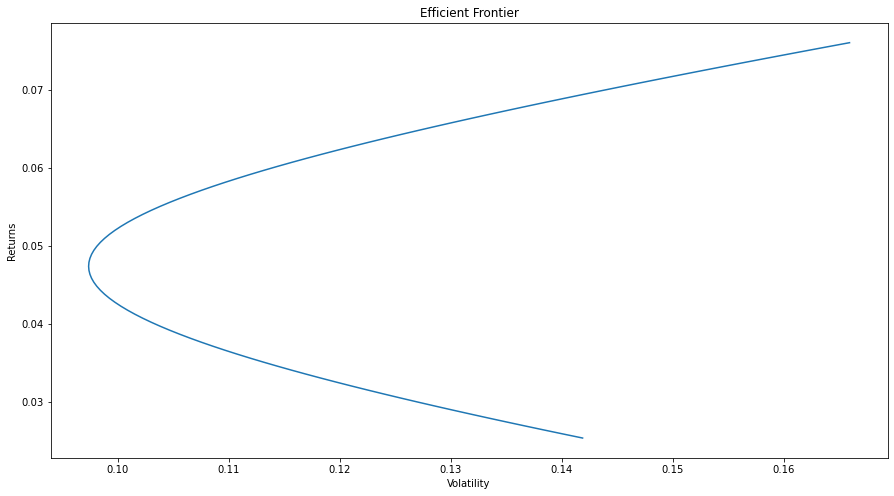

In [8]:
# We can use linspace to make the weights vary from 0 to 1:
w = np.linspace(0,1,100)
# Let's create an empty dataframe to append our calculations:
Port_Rets = []
Stdev = []
# for loop:
for W in w:
    # Returns
    Weight = [W, 1-W]
    Rets = Er*Weight
    Rets = Rets.sum()
    Port_Rets.append(Rets)
    # Standard Deviation
    Weight = np.array(Weight)
    Std = np.sqrt((np.dot(Weight, np.dot(cov,Weight.T))))*np.sqrt(12)
    Stdev.append(Std)

plt.plot(Stdev, Port_Rets)
plt.title('Efficient Frontier')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

How do we find the mean-variance portfolio?

We could simply use the formula:

<br>
\begin{align}
w_{a} & = \frac{\sigma_{b}^{2} - \rho_{a,b} \sigma_{a}\sigma_{b}}{\sigma_{a}^{2} + \sigma_{b}^{2} - 2 \rho_{a,b} \sigma_{a}\sigma_{b}}\\
w_{b} & = 1 - w_{a}\\
\end{align}
<br>
<br>
Alternatively, we could use a function to solve for this. Our goal is to minimize the standard deviation of the portfolio.

Sum of Weight: 100.0%


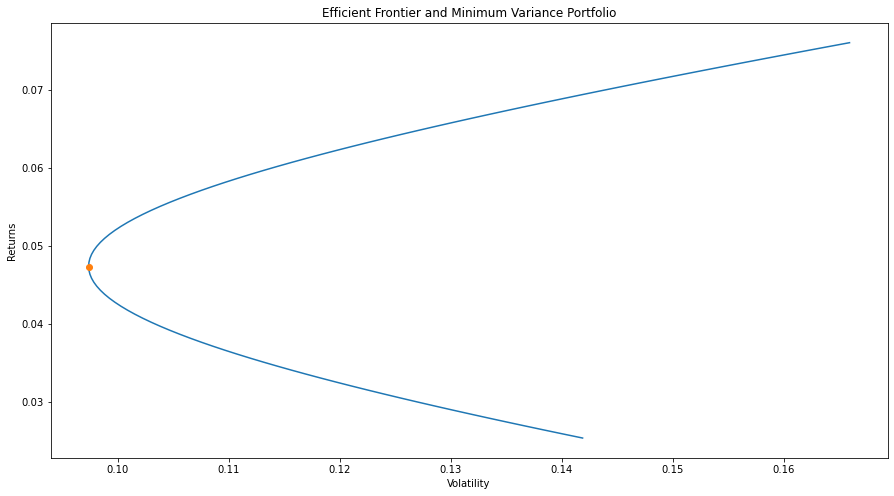

Expected Return: 0.047%
Expected Volatility: 0.097%
SPY Weight: 43.337%
TLT Weight: 56.663%


In [9]:
# Let's start with a function that gets our standard deviation
def minVol(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    return Stdev_opt

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the minimum variance portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
Var1 = minimize(minVol, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
W = Var1['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W),2)*100}%")
# Our returns would them be equal to:
Ret_opt = np.sum(Er * W)
# And the standard deviation equal to:
Std_opt = np.sqrt(np.dot(W, np.dot(cov, W.T))) * np.sqrt(12)

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o")
plt.title('Efficient Frontier and Minimum Variance Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()
print(f"Expected Return: {round(Ret_opt,3)}%")
print(f"Expected Volatility: {round(Std_opt,3)}%")
print(f"SPY Weight: {round(W[0]*100,3)}%")
print(f"TLT Weight: {round(W[1]*100,3)}%")

- Thus, our minimum variance portfolio has a 56.60% weight in TLT and a 43.40% weight in SPY.

Let's now find the optimal portfolio. Let's set our objective to be a point where we maximize sharpe. 

Sharpe being:
<br>
<br>
\begin{align}
Sharpe = \frac{\mathbb{E}(r) - r_{f}}{\sigma_{p}}
\end{align}
<br>
<br>
Consider the U.S. Treasury Securities at 1-Yr Constant Maturity as the risk-free rate.

In [10]:
# U.S. Treasury Securities at 1-Yr Constant Maturity
Rates = 'DGS1' #FRED
# Download data using pandas DataReader ('fred' for FRED data)
Rates = web.DataReader(Rates, 'fred', start, end)
Rates = Rates.dropna()
# .values[-1] will return the last value for the set
Rates = Rates['DGS1'].values[-1]/100 # as %
r = Rates
print(f'Rates: {round(r*100,4)}%')

Rates: 4.61%


Sum of Weight: 100.0%


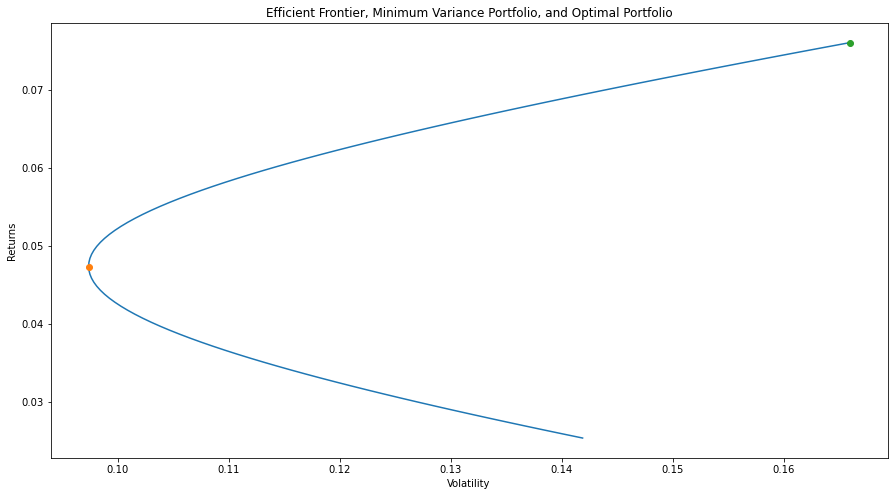

Expected Return: 7.604%
Expected Volatility: 16.592%
SPY Weight: 100.0%
TLT Weight: 0.0%


In [11]:
def maxSharpe(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    Rets = np.sum(Er * W_opt)
    Sharpe = (Rets - r)/Stdev_opt
    # To maximize sharpe, we are using a "minimize" goal, so
    # we need to minimize the "-sharpe"
    max_sharpe = Sharpe*(-1)
    return max_sharpe

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the optimal portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
M_Sharpe = minimize(maxSharpe, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
S = M_Sharpe['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W),2)*100}%")
# Our returns would them be equal to:
Ret_s = np.sum(Er * S)
# And the standard deviation equal to:
Std_s = np.sqrt(np.dot(S, np.dot(cov, S.T))) * np.sqrt(12)

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o")
plt.title('Efficient Frontier, Minimum Variance Portfolio, and Optimal Portfolio')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()
print(f"Expected Return: {round(Ret_s*100,3)}%")
print(f"Expected Volatility: {round(Std_s*100,3)}%")
print(f"SPY Weight: {round(S[0]*100,3)}%")
print(f"TLT Weight: {round(S[1]*100,3)}%")

- Thus, the tangent portfolio is 100% weighted in SPY, the "market portfolio".

To find the Capital Allocation Line (CAL), we consider the y-intercept to be the risk-free rate ($r_{f}$), and the slope to be the sharpe ratio. Therefore, the CAL is:
<br>
<br>
\begin{align}
CAL = r_{f} + \frac{\mathbb{E}(r_{m}) - r_{f}}{\sigma_{m}}\sigma_{p}
\end{align}
<br>


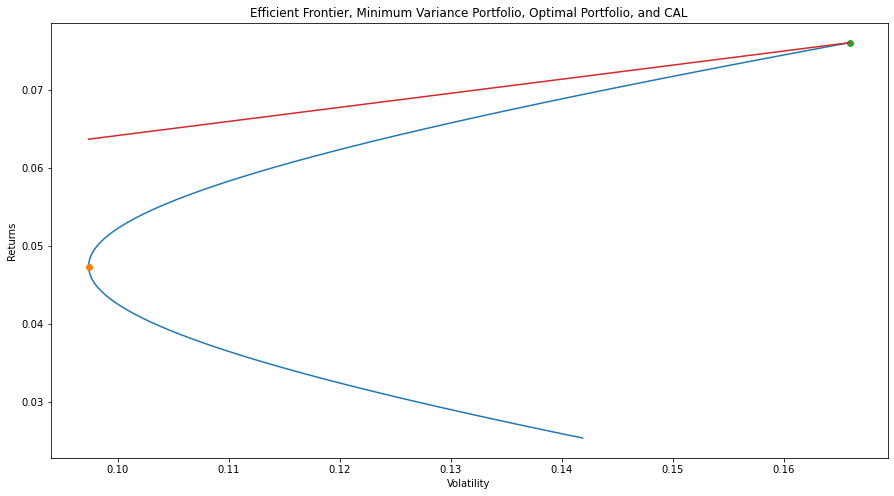

In [12]:
# Consider the max and min values for the standard deviation to be:
max_std = max(Stdev)
min_std = min(Stdev)
std_range = np.linspace(min_std, max_std, 100)

for stdev in std_range:
    Cal = r + ((Ret_s-r)/Std_s)*std_range

plt.plot(Stdev, Port_Rets, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o", std_range, Cal)
plt.title('Efficient Frontier, Minimum Variance Portfolio, Optimal Portfolio, and CAL')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

Let's now look at how could we use this to plot more than two assets.
<hr>
<h3> Multi Asset Portfolio </h3>
<br>
Please consider the following portfolio:
<br>
● <i>The Boeing Company (BA)</i>
<br>
● <i>Bank of America Corporation (BAC)</i>
<br>
● <i>Apple Inc. (AAPL)</i>
<br>
● <i>CVS Health Corporation (CVS)</i>
<br>
● <i>Johnson & Johnson (JNJ)</i>
<br>

In [13]:
Tickers = ['BA', 'BAC', 'AAPL', 'CVS', 'JNJ']
# Download data from Yahoo! (Adj Close to account for dividends and other corporate actions)
df = yf.download(Tickers, interval=interval, start=start)['Adj Close']
# Data into pandas dataframe
df = pd.DataFrame(df)
# Drop NaN (for non trading days)
df = df.dropna()
# Create a new DataFrame to calculate returns in continuous time
df1 = np.log(df) - np.log(df.shift(1))
# Drop first row (NaN)
df1 = df1[1::]

[*********************100%***********************]  5 of 5 completed


We can go ahead to our expected returns and covariance:

In [14]:
# 1. Expected returns
Er = ((np.prod(1+df1))**(12/((df1.count()))))-1
# Covariance Matrix
cov = df1.cov()
print(round(Er,3))
cov

AAPL    0.202
BA     -0.000
BAC    -0.134
CVS     0.053
JNJ     0.089
dtype: float64


,AAPL,BA,BAC,CVS,JNJ
AAPL,0.007431,0.002946,0.003430,0.001542,0.001171
BA,0.002946,0.010794,0.006435,0.002360,0.001424
BAC,0.003430,0.006435,0.018569,0.002979,0.002476
CVS,0.001542,0.002360,0.002979,0.004385,0.001017
JNJ,0.001171,0.001424,0.002476,0.001017,0.002014


This should return the minimum variance portfolio:

In [15]:
# Let's start with a function that gets our standard deviation
def minVol(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    return Stdev_opt

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that a 50-50 portfolio returns the minimum variance portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
Var1 = minimize(minVol, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
W = Var1['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W)*100,2)}%")
# Our returns would them be equal to:
Ret_opt = np.sum(Er * W)
# And the standard deviation equal to:
Std_opt = np.sqrt(np.dot(W, np.dot(cov, W.T))) * np.sqrt(12)

print(f"Expected Return: {round(Ret_opt*100,3)}%")
print(f"Expected Volatility: {round(Std_opt*100,3)}%")

# Let's create a dataframe for our weights:
N = df1.columns
Weights = [W, N]
Weights = pd.DataFrame(Weights).T
Weights.columns = ['Weight', 'Security']
Weights

Sum of Weight: 100.0%
Expected Return: 9.049%
Expected Volatility: 14.466%


,Weight,Security
0,0.079039,AAPL
1,0.000957,BA
2,0.0,BAC
3,0.202662,CVS
4,0.717343,JNJ


Our tangent portfolio is:

In [16]:
def maxSharpe(Weights):
    W_opt = np.array(Weights)
    Stdev_opt = np.sqrt(np.dot(W_opt, np.dot(cov, W_opt.T))) * np.sqrt(12)
    Rets = np.sum(Er * W_opt)
    Sharpe = (Rets - r)/Stdev_opt
    # To maximize sharpe, we are using a "minimize" goal, so
    # we need to minimize the "-sharpe"
    max_sharpe = Sharpe*(-1)
    return max_sharpe

# Now a function ensuring that the weights sum up to 1
def SumW(Weights):
    return np.sum(Weights)-1

# This will be our first guess for our weights
# Let's guess that an equally weighted portfolio returns the optimal portfolio
w0 = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# This is our bounds, again it can range from 0 to 1 (or -1 to 2 for long-short)
bounds = pd.Series([(0,1) for x in range(len(df1.columns))])

# Our constraint is that the sum of weights should be equal to 1
constraints = ({'type':'eq', 'fun': SumW})
# Now let's minimize our standard deviation, using our "guess" that the weights are equal, and the bound 0,1
M_Sharpe = minimize(maxSharpe, w0, method='SLSQP', bounds=bounds,
                       constraints=constraints)

# Our weights should be:
S = M_Sharpe['x']
# Let's print the sum of weights to make sure it is equal to 1:
print(f"Sum of Weight: {round(np.sum(W)*100,2)}%")
# Our returns would them be equal to:
Ret_s = np.sum(Er * S)
# And the standard deviation equal to:
Std_s = np.sqrt(np.dot(S, np.dot(cov, S.T))) * np.sqrt(12)

print(f"Expected Return: {round(Ret_s*100,3)}%")
print(f"Expected Volatility: {round(Std_s*100,3)}%")

# Let's create a dataframe for our weights:
N = df1.columns
Weights = [S, N]
Weights = pd.DataFrame(Weights).T
Weights.columns = ['Weight', 'Security']
Weights

Sum of Weight: 100.0%
Expected Return: 16.327%
Expected Volatility: 21.9%


,Weight,Security
0,0.660197,AAPL
1,0.0,BA
2,0.0,BAC
3,0.0,CVS
4,0.339803,JNJ


Plotting the Efficient Frontier:

In [17]:
# Let the max and min returns equal to:
max_ret1 = Er.max()
min_ret1 = Er.min()

# Returns num evenly spaced samples, calculated over the interval (3,000)
# you may want to reduce the number of steps to make this quicker
returns = np.linspace(min_ret1, max_ret1,3000)
# this empty dataframe will collect the output
vol_opt = []
# This function calculates the standard deviation just like the ones previously used.
# You may use the already created function in this step
def Stdev(Weights):
    W = np.array(Weights)
    Stdev_opt1 = np.sqrt(np.dot(W, np.dot(cov, W.T)))*np.sqrt(12)
    return Stdev_opt1
# This function calculates the returns as a function of weights
def Rets(Weights):
    W = np.array(Weights)
    Ret = np.sum(Er * W)
    return Ret

for Ret in returns:
    constraints = ({'type':'eq', 'fun':SumW},
                   {'type':'eq', 'fun': lambda w0: Rets(w0) - Ret})
    opt2 = minimize(Stdev, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    # append the output here
    vol_opt.append(opt2['fun'])

Stdev = np.array(vol_opt)
Ret = np.array(returns)

The CAL:

In [18]:
max_std = max(Stdev)
min_std = min(Stdev)
std_range = np.linspace(min_std, max_std, 100)

for stdev in std_range:
    Cal = r + ((Ret_s-r)/Std_s)*std_range

Finally, the efficient frontier:

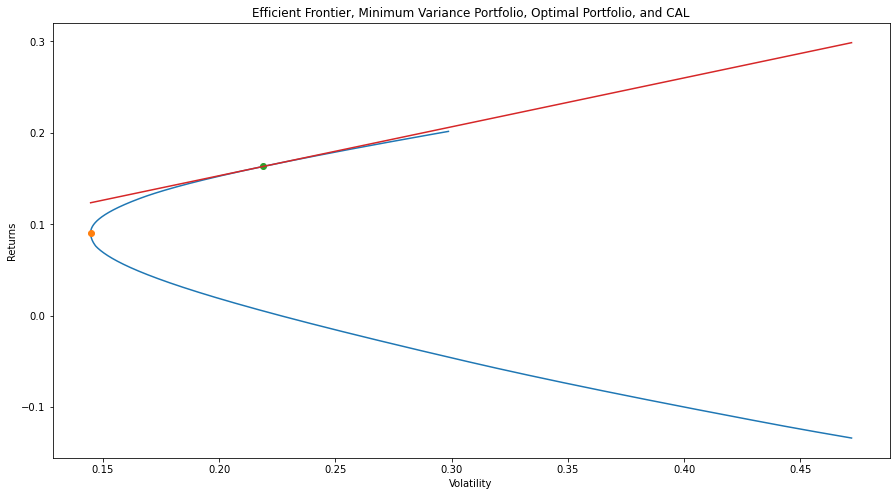

In [19]:
plt.plot(Stdev, Ret, Std_opt, Ret_opt, "o", Std_s, Ret_s, "o", std_range, Cal)
plt.title('Efficient Frontier, Minimum Variance Portfolio, Optimal Portfolio, and CAL')
plt.ylabel('Returns')
plt.xlabel('Volatility')
plt.show()

Let's assume that we have an equally weighted portfolio. How would we perform relative to the optimal (assume maximum Sharpe, i.e., the portfolio tangent to the CAL). At this point, you may want to use a benchmark (e.g., S&P 500, Russell 2000, MSCI EAFE, etc.)
<hr>
<h3> Return Attribution</h3>
<br>
For this exercise, let's look at the 
<a href="https://morningstardirect.morningstar.com/clientcomm/Morningstar-Total-Portfolio-Performance-Attribution-Methodology.pdf">Morningstar® Total Portfolio Performance Attribution Methodology.</a> The analysis is based on the Brinson–Hood–Beebower (BHB) Model.
<br>

$$
\begin{aligned}
& \text { Table 1.1. Total Portfolio Performance Attribution }\\
&\begin{array}{cc}
\hline
\hline \text{ Tactical Asset Allocation } & \sum (w_{j}^P - w_{j}^B ) \cdot R_{j}^B \\
\text{ Stock Selection } & \sum w_{j}^B \cdot (R_{j}^P - R_{j}^B) \\
\text{ Interation }  & \sum (w_{j}^P - w_{j}^B ) \cdot (R_{j}^P - R_{j}^B) \\ \hline
\text{ Total Value Added }  & \sum (w_{j}^P \cdot R_{j}^P ) - (w_{j}^B \cdot R_{j}^B) \\
\hline
\end{array}
\end{aligned}
$$
<br>
<br>
$$
\begin{aligned}
& \text { Where }\\
&\begin{array}{cc}
\hline w_{j}^P & \text { The portfolio's weighting for group }j \\
w_{j}^B &  \text { The benchmark's weighting for group }j \\
R_{j}^P  &  \text { The portfolio's return for group }j \\
R_{j}^B  &  \text { The benchmark's return for group }j \\
\hline
\end{array}
\end{aligned}
$$
<br>
<br>
Consider the return attribution for our last month:

In [20]:
# The optimal portfolio weights:
Opt_Weight = Weights['Weight']
Sector = Weights['Security']
# An equally weighted portfolio:
Equal_Weight = pd.Series([1/len(df1.columns) for x in range(len(df1.columns))])
# We could construct the following dataframe for our return attribution (RA):
RA = [Sector, Equal_Weight, Opt_Weight]
RA = pd.DataFrame(RA).T
RA.columns = ['Security/Sector', 'Portfolio Weight', 'Benchmark Weight']
# Last month's returns:
# We can use the same returns since our "benchmark" holds the same securities.
RA['Returns'] = df1[-2:-1:].values.T
# Tactical Asset Allocation:
RA['Tactical Allocation'] = (RA['Portfolio Weight'] - RA['Benchmark Weight']) * RA['Returns']
# Tactical Asset Allocation:
RA['Stock Selection'] = RA['Benchmark Weight'] * (RA['Returns'] - RA['Returns'])
# Tactical Asset Allocation:
RA['Interaction'] = (RA['Portfolio Weight'] - RA['Benchmark Weight']) * (RA['Returns'] - RA['Returns'])
# Tactical Asset Allocation:
RA['Total Value Added'] = (RA['Portfolio Weight'] * RA['Returns']) - (RA['Benchmark Weight']*RA['Returns'])
# Portfolio Return:
Port_Ret = np.sum(RA['Portfolio Weight']*RA['Returns'])
# Benchmark Return:
BMR = np.sum(RA['Benchmark Weight']*RA['Returns'])
# Overview:
RA.loc[len(RA.index)] = ['Portfolio', np.sum(RA['Portfolio Weight']), np.sum(RA['Benchmark Weight']),
                         Port_Ret ,np.sum(RA['Tactical Allocation']), np.sum(RA['Stock Selection']),
                         np.sum(RA['Interaction']), np.sum(RA['Total Value Added'])]

print(f"Portfolio Return: {round(Port_Ret*100,2)}%")
print(f"Benchmark Return: {round(BMR*100,2)}%")
print(f"Outperformance: {round(((Port_Ret - BMR)*100),2)}%")

RA

Portfolio Return: -6.32%
Benchmark Return: -7.54%
Outperformance: 1.22%


,Security/Sector,Portfolio Weight,Benchmark Weight,Returns,Tactical Allocation,Stock Selection,Interaction,Total Value Added
0,AAPL,0.2,0.660197,-0.110157,0.050694,0.0,-0.0,0.050694
1,BA,0.2,0.0,0.037310,0.007462,0.0,0.0,0.007462
2,BAC,0.2,0.0,-0.166022,-0.033204,0.0,0.0,-0.033204
3,CVS,0.2,0.0,-0.069393,-0.013879,0.0,0.0,-0.013879
4,JNJ,0.2,0.339803,-0.007825,0.001094,0.0,-0.0,0.001094
5,Portfolio,1.0,1.0,-0.063217,0.012167,0.0,0.0,0.012167


We could plot this using a waterfall chart:

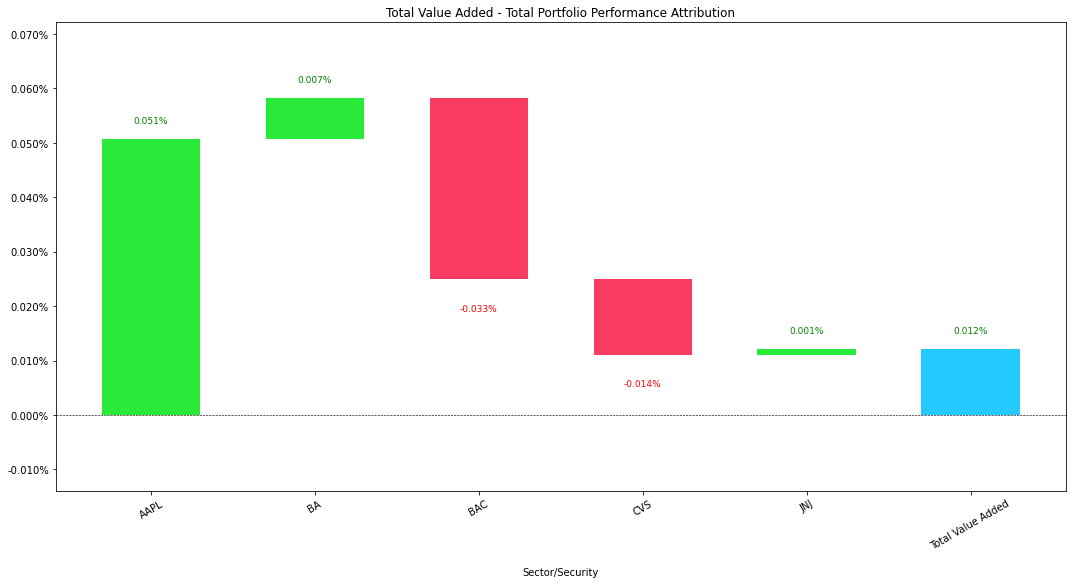

In [21]:
# Here we are just plotting the total value added, but you could use subplots to plot all four.
x1,y1=(RA['Security/Sector'][:-1:]).values,(RA['Total Value Added'][:-1:]).values
# Import package waterfall_charts as waterfall 
plot = waterfall.plot(x1, y1, net_label='Total Value Added', 
                      x_lab = 'Sector/Security',formatting ='{:.3f}%')
plot.title('Total Value Added - Total Portfolio Performance Attribution')
plot.show()

<hr>
<h2>Factor Attribution (Fama-French Factors + Momentum)</h2>
<br>
See <a href="https://faculty.newpaltz.edu/yuanwen/files/Fama-French-Three-Factor-Model.pdf">Multifactor Explanations of Asset Pricing Anomalies (Fama & French, 1996)</a>
<br>

<i><b>Data - Benchmark and Portfolio</b></i>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  5 of 5 completed


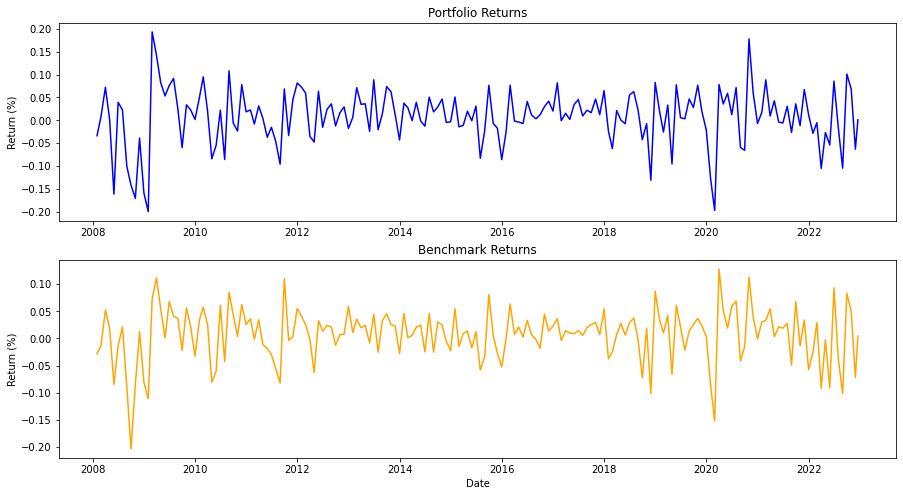

In [22]:
# Benchmark
BM = ['IWV']
BM = yf.download(BM, interval='1mo', start=start)['Adj Close']
BM = pd.DataFrame(BM)
BM = BM.dropna()
BM = np.log(BM) - np.log(BM.shift(1))
BM = BM[1::]
BM.columns = ['IWV']

# Portfolio:
Tickers = ['BA', 'BAC', 'AAPL', 'CVS', 'JNJ']
df = yf.download(Tickers, interval='1mo', start=start)['Adj Close']
df = pd.DataFrame(df)
df = df.dropna()
df1 = np.log(df) - np.log(df.shift(1))
df1 = df1[1::]
w = pd.Series([(1/(len(df.columns)))for x in range(len(df.columns))])
w = [weight for weight in w]
Port_Ret = np.sum(df1*w, axis=1)
Port_Ret = pd.DataFrame(Port_Ret)
Port_Ret.columns = ['Portfolio Return']

# Plots:
plt.subplot(2, 1, 1)
plt.plot(Port_Ret.index,Port_Ret['Portfolio Return'], color='blue')
plt.ylabel('Return (%)')
plt.title('Portfolio Returns')
plt.subplot(2, 1, 2)
plt.plot(BM.index,BM['IWV'], color='orange')
plt.xlabel('Date')
plt.title('Benchmark Returns')
plt.ylabel('Return (%)')
plt.show()

In [23]:
df_ff3_monthly = gff.carhart4Factor(frequency='m') # You could also use other factors (e.g., 3 Factors, 5 Factors, etc.)
df_ff3_monthly = df_ff3_monthly.rename(columns={"date_ff_factors": 'Date'})
df_ff3_monthly.set_index('Date', inplace=True)
FF3 = pd.merge_asof(Port_Ret['Portfolio Return'], df_ff3_monthly, on='Date')
FF3 = pd.merge_asof(FF3, BM['IWV'], on='Date')
FF3 = FF3[1::]
FF3.set_index('Date', inplace=True)
FF3['P-rf'] = FF3['Portfolio Return']-FF3['RF'] # Arithmetic
FF3['BM-rf'] = FF3['IWV'] - FF3['RF'] # Arithmetic

In [24]:
X = FF3[['BM-rf', 'SMB', 'HML', 'MOM']]
y = FF3['P-rf']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
ff_model = ff_model.summary()
ff_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   P-rf   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     145.5
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           2.15e-54
Time:                        22:45:32   Log-Likelihood:                 376.46
No. Observations:                 179   AIC:                            -742.9
Df Residuals:                     174   BIC:                            -727.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.651e-05      0.002      0.038      0.970      -0.004       0.005
BM-rf          1.1007      0.046     23.882      0.000       1.010       1.192
SMB            0.0651      0.093      0.698      0.486      -0.119       0.249
HML            0.1447      0.068      2.116      0.036       0.010       0.280
MOM            0.0182      0.052      0.348      0.729      -0.085       0.122
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.021   Jarque-Bera (JB):               13.022
Skew:                           0.133   Prob(JB):                      0.00149
Kurtosis:                       4.294   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<hr>
<h2>Value at Risk (VaR)</h2>
<br>
See <a href="https://people.duke.edu/~charvey/Teaching/BA453_2002/Satchmo/VAR.htm#ParametricVAR">Value-At-Risk Overview (Prof. Campbell R. Harvey, Duke University - Fuqua School of Business)</a>
<br>

1. Monte Carlo Simulation
- Assume an initial portfolio value of $\$1,000,000$

<i><b>Data</b></i>

[*********************100%***********************]  5 of 5 completed


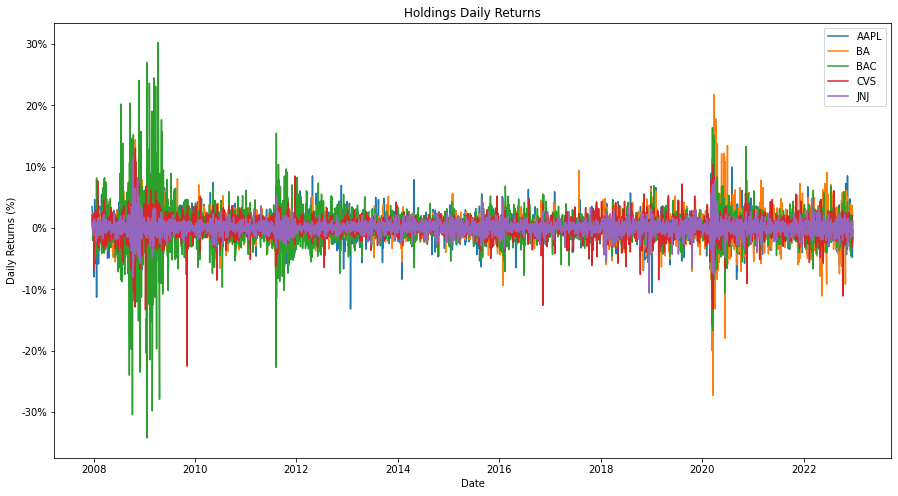

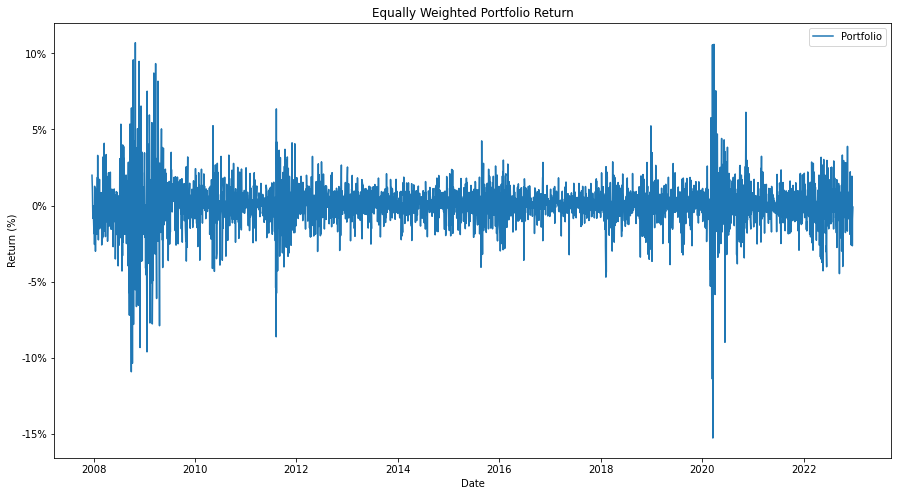

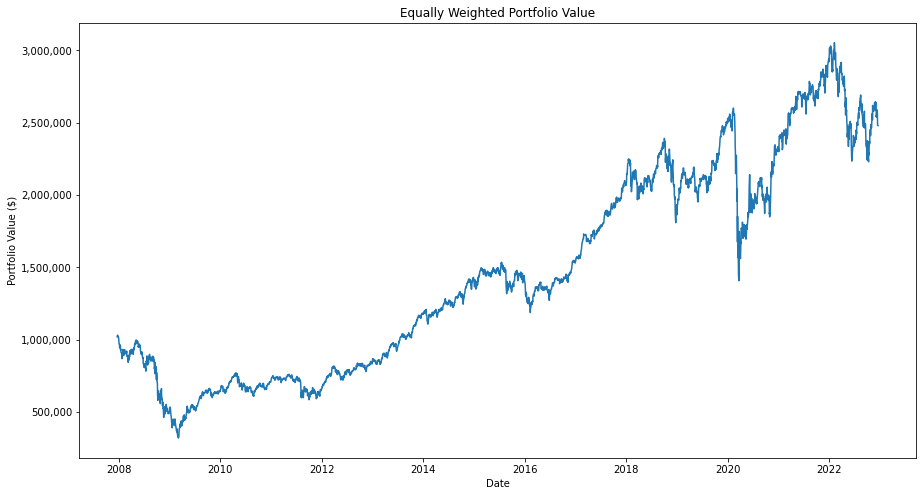

In [25]:
Tickers = ['BA', 'BAC', 'AAPL', 'CVS', 'JNJ']
# Download data from Yahoo! (Adj Close to account for dividends and other corporate actions)
df = yf.download(Tickers, interval='1d', start=start)['Adj Close']
# Data into pandas dataframe
df = pd.DataFrame(df)
# Drop NaN (for non trading days)
df = df.dropna()
# Create a new DataFrame to calculate returns in continuous time
df1 = np.log(df) - np.log(df.shift(1))
# Drop first row (NaN)
df1 = df1[1::]

# Plot:
plt.plot(df1)
plt.legend([i for i in df.columns])
plt.title('Holdings Daily Returns')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.ylabel('Daily Returns (%)')
plt.xlabel('Date')
plt.show()

# Portfolio:
w = pd.Series([(1/(len(df.columns)))for x in range(len(df.columns))])
w = [weight for weight in w]
Rets = np.sum(df1*w, axis=1)

# Plot:
plt.plot(Rets.index, Rets)
plt.legend(['Portfolio'])
plt.title('Equally Weighted Portfolio Return')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.ylabel('Return (%)')
plt.xlabel('Date')
plt.show()

# Growth of $1,000,000 Portfolio:
plt.plot(Rets.index, (1000000*(1+Rets).cumprod()))
plt.title('Equally Weighted Portfolio Value')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.show()

<h3>a. Geometric Brownian Motion (GBR):</h3>
<br>
\begin{align}
S_{t} & = S_{0} e^{(\mu - \frac{\sigma^{2}}{2})t + \sigma \varepsilon \sqrt{t}}\\
\frac{S_{t}}{S_{0}} & = e^{(\mu - \frac{\sigma^{2}}{2})t + \sigma \varepsilon \sqrt{t}}\\
\therefore ln \left(\frac{S_{t}}{S_{0}}\right) & = (\mu - \frac{\sigma^{2}}{2})t + \sigma \varepsilon \sqrt{t}\\ 
\end{align}
<br>

In [26]:
I = 1000                                         # Number of Simulations
M = 100                                          # Cut up time into chunks
T = 1                                            # Make the time horizon a year
dt = T/M                                         # Time step
sigma = Rets.std()*np.sqrt(252)                  # Daily Variance at t = 0
mu = Rets.mean()                                 # Average Returns
S0 = 1000000                                     # Initial Portfolio Value
S = np.zeros((M+1,I))                            # Store the price paths
S[0] = S0                                        # Set the first row to be S0

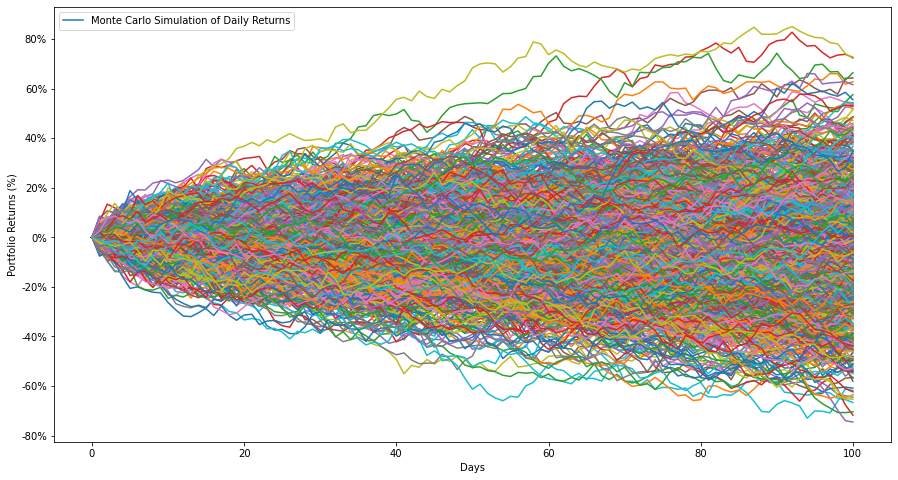

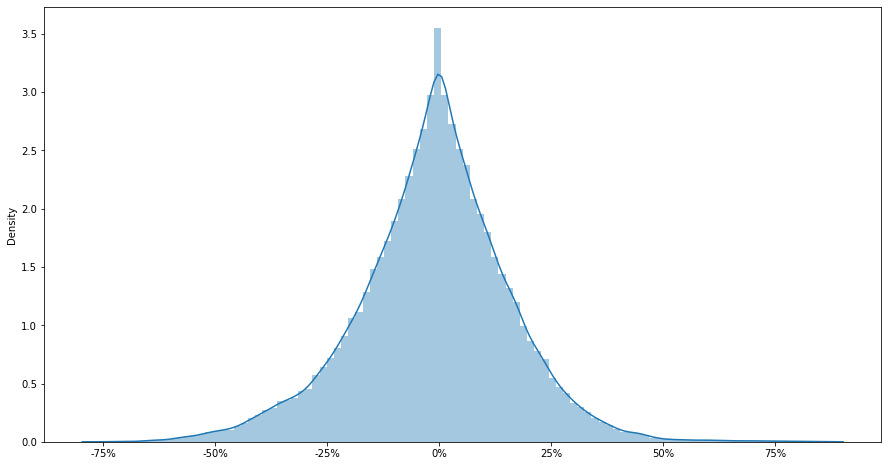

In [27]:
for t in range(1, M + 1):
    S[t] = S[t-1]*np.exp((mu-(0.5)*sigma**2)*dt + sigma*np.sqrt(dt)*npr.standard_normal(I))
    rets = np.log(S/S0)

# Plot
plt.plot(rets)
plt.legend(['Monte Carlo Simulation of Daily Returns'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.ylabel('Portfolio Returns (%)')
plt.xlabel('Days')
plt.show()

sns.distplot(rets, kde=True, bins=100, hist=True)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.show()

<i><b>VaR and CVaR</b></i>

In [28]:
def VaR(ret, alpha):
    """
    Input: series of returns
    Output: percentile on return distribution to a given confidence level
    """
    if isinstance(ret, pd.Series):
        return np.percentile(ret, alpha)
    else:
        raise TypeError("Data is not in correct format")
        
def CVaR(ret, alpha):
    """
    Input: series of returns
    Output: CVaR to a given confidence level
    """
    if isinstance(ret, pd.Series):
        belowVaR = ret <= VaR(ret, alpha)
        return ret[belowVaR].mean()
    else:
        raise TypeError("Data is not in correct format")

In [29]:
port_rets = pd.Series(rets[-1, :])
alphas = [1, 5, 10]

for alpha in alphas:
    Var = - VaR(port_rets, alpha=alpha)*S0
    CVar = - CVaR(port_rets, alpha=alpha)*S0
    print(f"VaR {100-alpha}% : ${'{:,}'.format(round(Var,2))}")
    print(f"CVaR {100-alpha}%: ${'{:,}'.format(round(CVar,2))}")

# # Plot:
# sns.distplot(S, kde=True, bins=100, hist=True)
# plt.axvline(P - Var, label='VaR', color='red')
# plt.axvline(P - CVar, label='VaR', color='green')
# current_values = plt.gca().get_xticks()
# plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
# plt.show()

VaR 99% : $608,873.54
CVaR 99%: $664,732.99
VaR 95% : $447,891.33
CVaR 95%: $532,746.1
VaR 90% : $358,326.83
CVaR 90%: $465,423.2


<h3> b. Correlated Monte Carlo Simulation using Cholesky Decomposition </h3>
<br>
See <a href="https://deliverypdf.ssrn.com/delivery.php?ID=017096020116093002015030006025088098015051021063079059125002020095123125109008068127006055125009047120052119028116025097022079052085021064086097089093087106003088066057085035119006006094096002113127025080070004108076066088000112082102066083108071027117&EXT=pdf&INDEX=TRUE">Cholesky Decomposition (Burgess, 2022)</a>
<br>

In [30]:
I = 1000                                                         # Number of Simulations
M = 100                                                          # Days
P = 1000000                                                      # Initial Portfolio Value
w = w                                                            # Weights
mu_returns = np.full((M, len(w)), df1.mean()).T                  # Mean Daily Returns
cov = df1.cov()                                                  # Covariance Matrix of Daily Returns
Port_Sim = np.full((M, I), P)                                    # Store the price paths

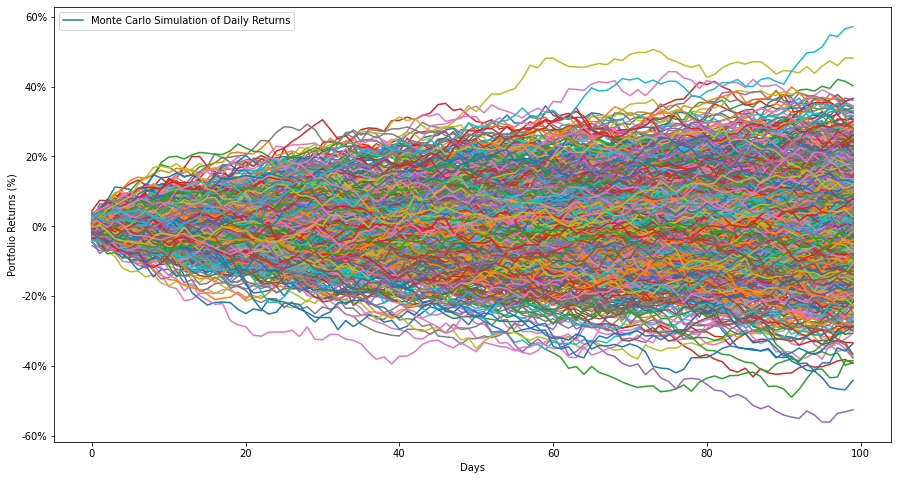

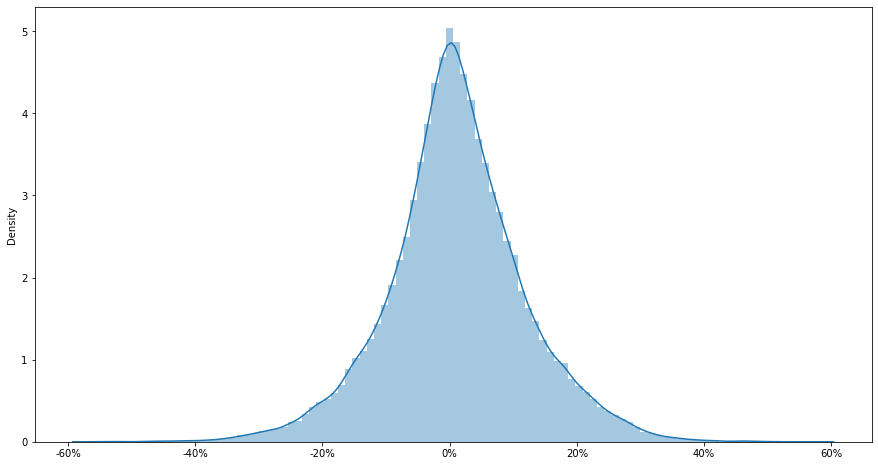

In [31]:
for t in range(0, I):
    Z = np.random.normal(size=(M, len(w)))
    L = np.linalg.cholesky(cov)
    daily_ret = mu_returns + np.inner(L, Z)
    # The porfolio return is the sum of weights times individual return:
    Port_Sim[:, t] = np.cumprod(np.inner(w, daily_ret.T)+1)*P
    rets = np.log(Port_Sim/P)

# Plot
plt.plot(rets)
plt.legend(['Monte Carlo Simulation of Daily Returns'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.ylabel('Portfolio Returns (%)')
plt.xlabel('Days')
plt.show()

sns.distplot(rets, kde=True, bins=100, hist=True)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.show()

<i><b>VaR and CVaR</b></i>

In [32]:
port_rets = pd.Series(rets[-1, :])
alphas = [1, 5, 10]

for alpha in alphas:
    Var = - VaR(port_rets, alpha=alpha)*S0
    CVar = - CVaR(port_rets, alpha=alpha)*S0
    print(f"VaR {100-alpha}% : ${'{:,}'.format(round(Var,2))}")
    print(f"CVaR {100-alpha}%: ${'{:,}'.format(round(CVar,2))}")

VaR 99% : $333,273.55
CVaR 99%: $396,548.71
VaR 95% : $226,578.53
CVaR 95%: $295,030.24
VaR 90% : $174,760.27
CVaR 90%: $245,722.25


<h3>c. Geometric Brownian Motion (GBR) + GARCH:</h3>
<br>
<br>
See <a href="https://github.com/leofelip/Finance/blob/main/deSouza%2C%20Leonardo%20-%20Binomial%20Model_Final.ipynb">Derivative Pricing under GARCH</a>
<br>

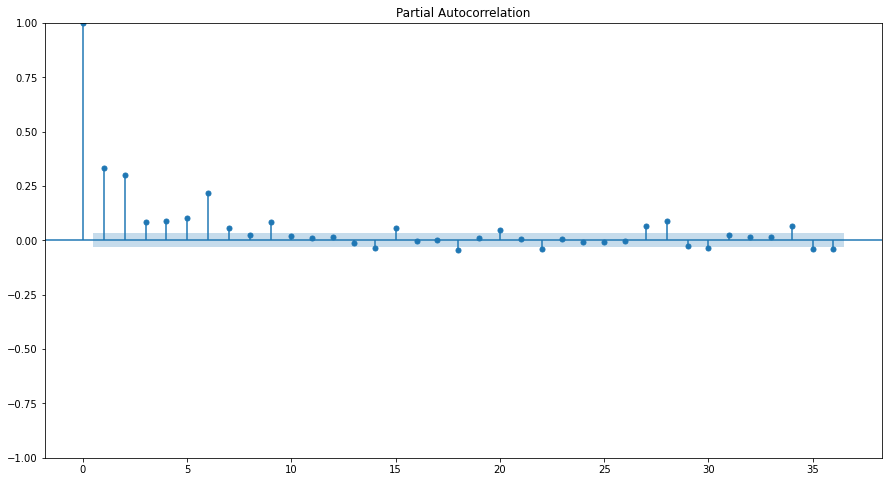

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                11533.9
Distribution:                  Normal   AIC:                          -23057.7
Method:            Maximum Likelihood   BIC:                          -23026.5
                                        No. Observations:                 3775
Date:                Mon, Dec 19 2022   Df Residuals:                     3774
Time:                        22:45:42   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.3570e-04  1.031e-05     51.967      0.000 [5.155e-04,5.559e-04]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.6566e-06  3.353e-12  1.090e+06      0.000  [3.657e-06,3.657e-06]
alpha[1]       0.0219  1.268e-02      1.729  8.379e-02 [-2.928e-03,4.679e-02]
gamma[1]       0.1649  2.129e-02      7.747  9.399e-15      [  0.123,  0.207]
beta[1]        0.8730  1.129e-02     77.355      0.000      [  0.851,  0.895]
=============================================================================

Covariance estimator: robust
"""

In [33]:
plot_pacf(Rets**2)
plt.show()

def garch_model(p,q):
    return arch_model(Rets, p=p, o=1, q=q)
p=1
q=1
model_fit = garch_model(p,q).fit(disp='off')
model_fit.summary()

In [34]:
n = 252                         # Number of Trading Days in a Year
I = 1000                        # Number of Simulations
M = 100                         # Cut up time into chunks
T = 1                           # Make the time horizon a year
dt = T/M                        # Time step
sigma_sq = (Rets).std()**(2/n)  # Daily Variance at t = 0
r = r/n                         # Daily Interest Rate
S0 = S0                         # Spot = Portfolio Value
omega = model_fit.params[1]     # Constant in Variance Calculation
alpha1 = model_fit.params[4]    # Autoregressive Coefficient
beta1 = model_fit.params[2]     # Error Coefficient
gamma = model_fit.params[3]     # Asymmetry Parameter
print(omega, alpha1, beta1, gamma)

S = np.zeros((M+1,I))           # Store the price paths
S[0] = 1000000                  # Set the first row to be Initial Portfolio Value
Sigma = np.zeros((M+1,I))       # Store the price paths
Sigma[0] = sigma_sq             # Set the first row to be Initial Volatility

3.6565596003601786e-06 0.8730408674225504 0.021928760525983252 0.16490674900563843


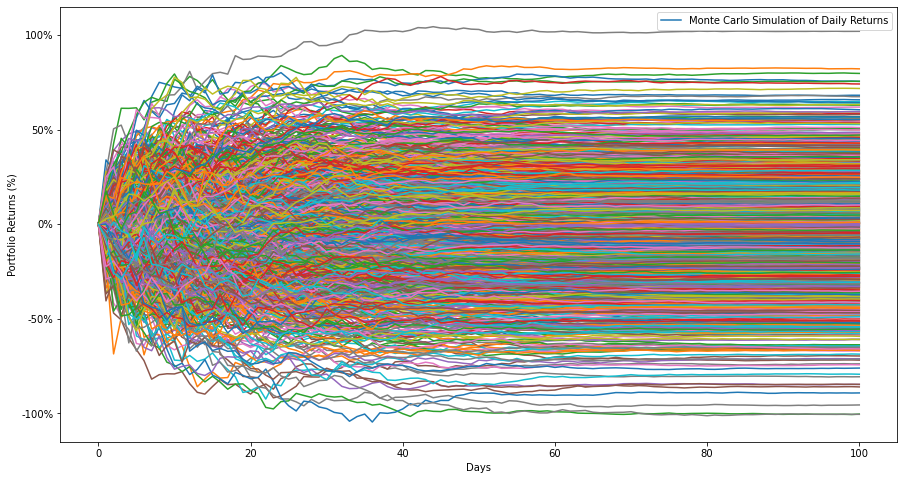

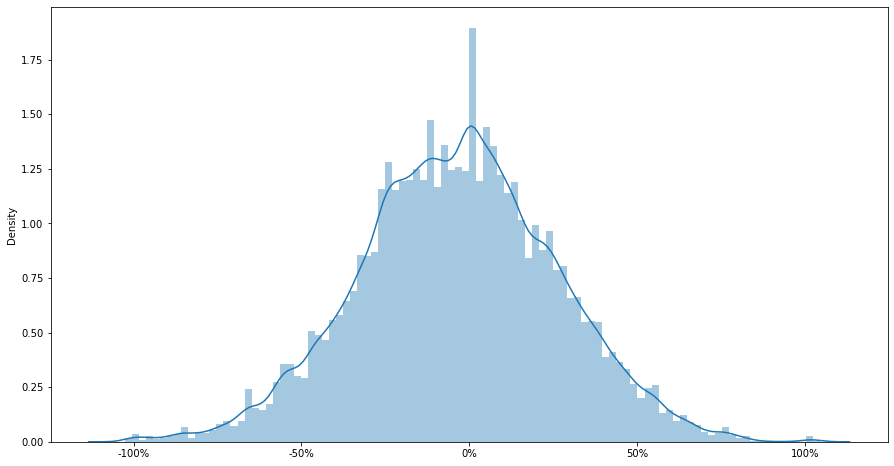

In [35]:
for t in range(1, M + 1):
    shock = npr.standard_normal(I)
    Sigma[t] = omega + alpha1*Sigma[t-1]+ beta1*Sigma[t-1] * ((shock - gamma)**2)
    S[t] = S[t-1]*np.exp((r-(0.5)*Sigma[t])*dt + np.sqrt(Sigma[t])*np.sqrt(dt)*shock)
    rets = np.log(S/S0)

# Plot
plt.plot(rets)
plt.legend(['Monte Carlo Simulation of Daily Returns'])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.ylabel('Portfolio Returns (%)')
plt.xlabel('Days')
plt.show()

sns.distplot(rets, kde=True, bins=100, hist=True)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.show()

<i><b>VaR and CVaR</b></i>

In [36]:
port_rets = pd.Series(rets[-1, :])
alphas = [1, 5, 10]

for alpha in alphas:
    Var = - VaR(port_rets, alpha=alpha)*S0
    CVar = - CVaR(port_rets, alpha=alpha)*S0
    print(f"VaR {100-alpha}% : ${'{:,}'.format(round(Var,2))}")
    print(f"CVaR {100-alpha}%: ${'{:,}'.format(round(CVar,2))}")

VaR 99% : $743,609.26
CVaR 99%: $877,071.23
VaR 95% : $549,927.58
CVaR 95%: $677,549.96
VaR 90% : $432,397.4
CVaR 90%: $583,855.25


<h2> Historical VaR </h2>

In [37]:
def hist_VaR(ret, alpha):
    """
    Input: series of returns
    Output: percentile on return distribution to a given confidence level
    """
    if isinstance(ret, pd.Series):
        return np.percentile(ret, alpha)
    elif isinstance(ret, pd.DataFrame):
        return ret.aggregate(hist_VaR, alpha)
    else:
        raise TypeError("Data is not in correct format")
        
def hist_CVaR(ret, alpha):
    """
    Input: series of returns
    Output: CVaR to a given confidence level
    """
    if isinstance(ret, pd.Series):
        belowVaR = ret <= hist_VaR(ret, alpha)
        return ret[belowVaR].mean()
    elif isinstance(ret, pd.DataFrame):
        return ret.aggregate(hist_CVaR, alpha)
    else:
        raise TypeError("Data is not in correct format")

In [38]:
port_rets = pd.Series(Rets)
alphas = [1, 5, 10]
ts = [1, 30, 252]

for t in ts:
    for alpha in alphas:
        Var = -hist_VaR(port_rets, alpha=alpha)*np.sqrt(t)
        CVar = -hist_CVaR(port_rets, alpha=alpha)*np.sqrt(t)
        print(f"{t} trading days:")
        print(f"VaR {100-alpha}% : ${'{:,}'.format(round(P*Var,2))}")
        print(f"CVaR {100-alpha}%: ${'{:,}'.format(round(P*CVar,2))}")
        print()

1 trading days:
VaR 99% : $44,457.65
CVaR 99%: $69,064.6

1 trading days:
VaR 95% : $22,806.43
CVaR 95%: $38,165.12

1 trading days:
VaR 90% : $15,052.76
CVaR 90%: $28,265.72

30 trading days:
VaR 99% : $243,504.6
CVaR 99%: $378,282.4

30 trading days:
VaR 95% : $124,915.99
CVaR 95%: $209,038.95

30 trading days:
VaR 90% : $82,447.38
CVaR 90%: $154,817.71

252 trading days:
VaR 99% : $705,743.39
CVaR 99%: $1,096,366.54

252 trading days:
VaR 95% : $362,040.92
CVaR 95%: $605,852.42

252 trading days:
VaR 90% : $238,955.19
CVaR 90%: $448,704.35



<h2> Parametric VaR </h2>
<br>
<i><b>VaR</b></i>
<br>
\begin{align}
\text{Normal Distribution } VaR_{\alpha,h} & = \mu W - \alpha_{h} \sigma W\\
\text{t-Distribution } VaR_{\nu,\alpha, h} & = \sqrt{\nu^{-1}(v-2)} t_{v}^{-1}(1-\alpha)\sigma_{h} - \mu_{h}
\end{align}
<br>
<br>
<i><b>CVaR</b></i>
<br>
\begin{align}
\text{Normal Distribution } CVaR_{\alpha,h} & = \alpha^{-1} \phi(\Phi^{-1}(\alpha))\sigma_{h}-\mu_{h}\\
\text{t-Distribution } CVaR_{\nu,\alpha, h} & = -\alpha^{-1}(1-\nu)^{-1}(\nu - 2 + x_{\alpha, \nu}^{2})f_{\nu}(x_{\alpha, \nu})\sigma_{h} - \mu_{h}
\end{align}
<br>

In [39]:
def par_VaR(ret, std, dist, alpha, nu):
    """
    Input: series of returns
    Output: percentile on return distribution to a given confidence level
    """
    if dist == 'N':
        VaR = norm.ppf(1-(alpha/100))*std - ret
    elif dist == 'td':
        VaR = np.sqrt((nu-2)/nu) * tdist.ppf((1-(alpha/100)), nu)*std - ret
    else:
        raise TypeError("No Calculation for given distribution")
    return VaR
        
def par_CVaR(ret, std, dist, alpha, nu):
    """
    Input: series of returns
    Output: CVaR to a given confidence level
    """
    if dist == 'N':
        CVaR = (alpha/100)**(-1) * norm.pdf(norm.ppf(alpha/100))*std - ret
    elif dist == 'td':
        x = (tdist.ppf((alpha/100), nu))
        CVaR = -((alpha/100)**(-1))*((1-nu)**(-1))*(nu-2 + x**2) * (tdist.pdf(x, nu)*std) - ret
    else:
        raise TypeError("No Calculation for given distribution")
    return CVaR

In [40]:
ret = Rets.mean()*252
std = Rets.std()*np.sqrt(252)
dists = ['N', 'td']
alphas = [1, 5, 10]
nu = 10

for dist in dists:
    for alpha in alphas:
        Var = par_VaR(ret, std, dist, alpha, nu)
        CVar = par_CVaR(ret, std, dist, alpha, nu)
        print(f"{dist}-Distribution:")
        print(f"VaR {100-alpha}% : ${'{:,}'.format(round(P*Var,2))}")
        print(f"CVaR {100-alpha}%: ${'{:,}'.format(round(P*CVar,2))}")
        print()

N-Distribution:
VaR 99% : $477,670.19
CVaR 99%: $560,459.08

N-Distribution:
VaR 95% : $311,173.43
CVaR 95%: $413,261.16

N-Distribution:
VaR 90% : $222,414.62
CVaR 90%: $338,079.36

td-Distribution:
VaR 99% : $513,252.35
CVaR 99%: $637,828.11

td-Distribution:
VaR 95% : $305,373.69
CVaR 95%: $409,135.76

td-Distribution:
VaR 90% : $209,164.83
CVaR 90%: $313,506.1



________________________________________________________________________________________________________________________
###### Leonardo F. de Souza
###### 2022